### TOMEK - Class imbalance
### Feature selction - embedded method - random forest classifier

In [1]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
len(df)

4250

In [4]:
len(df.columns)

20

In [5]:
len(df)

4250

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data preprocessing

In [7]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data types of columns

In [8]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

##  encoding data

 Here international plan and voice mail plan are two columns with yes or no values. The best method to encode categorical variables with values Yes/No is replacing them with 1/0
Yes - 1
No - 0

In [9]:
features=["international_plan","voice_mail_plan","churn"]

In [10]:
def encodeYesNo(feature):
    df.loc[df[feature] == 'yes', feature] = 1
    df.loc[df[feature] == 'no', feature ] = 0

In [11]:
for feature in features:
    encodeYesNo(feature)

In [12]:
df[features].head()

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [13]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


###  Encoding Other features 

In [14]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [15]:
len(df["state"].unique())

51

In [16]:
df["area_code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [17]:
ordinal_features = ["state","area_code"]
ce_ord = ce.TargetEncoder(cols = ordinal_features)
df = ce_ord.fit_transform(df,df["churn"])

In [18]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,0.125000,147,0.136148,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,0.101449,117,0.139963,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,0.136691,141,0.136148,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,0.156627,65,0.136148,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,0.068966,74,0.136148,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


In [19]:
df["state"].unique()

array([0.12631579, 0.27083333, 0.20512821, 0.15730337, 0.125     ,
       0.10144928, 0.13669065, 0.15662651, 0.06896552, 0.11290323,
       0.2125    , 0.16666667, 0.11320755, 0.05      , 0.19387755,
       0.11842105, 0.1125    , 0.09090909, 0.19444444, 0.10526316,
       0.05194805, 0.12820513, 0.06557377, 0.109375  , 0.22093023,
       0.15492958, 0.07446809, 0.15151515, 0.17241379, 0.1625    ,
       0.12371134, 0.25641026, 0.14666667, 0.0875    , 0.225     ,
       0.17592593, 0.20481928, 0.11111111, 0.11627907, 0.14117647,
       0.17977528, 0.18292683, 0.12871287, 0.06849315, 0.15189873,
       0.07594937, 0.11940299, 0.17045455, 0.08955224])

In [20]:
df["area_code"].unique()

array([0.13614801, 0.13996317, 0.15056818])

## Scaling the dataset

In [21]:
scaled_df=df

In [22]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [23]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df[['account_length','number_vmail_messages', 'total_day_minutes',"total_day_calls","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls"]]) 


In [24]:
scaled_df['account_length'] = scaled[:,0]
scaled_df['number_vmail_messages'] = scaled[:,1]
scaled_df['total_day_minutes'] = scaled[:,2] 
scaled_df['total_day_calls'] = scaled[:,3]
scaled_df['total_day_charge'] = scaled[:,4]
scaled_df['total_eve_minutes'] = scaled[:,5]
scaled_df['total_eve_charge'] = scaled[:,6]
scaled_df['total_night_minutes'] = scaled[:,7]
scaled_df['total_night_calls'] = scaled[:,8] 
scaled_df['total_night_charge'] = scaled[:,9]
scaled_df['total_intl_minutes'] = scaled[:,10]
scaled_df['total_intl_calls'] = scaled[:,11]
scaled_df['total_intl_charge'] = scaled[:,12]
scaled_df['number_customer_service_calls'] = scaled[:,13]

In [25]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346,0
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960,0
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882,0


# Splitting training dataset into test and train

In [26]:
x = df.drop("churn",axis=1)


In [27]:
x.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882


In [28]:
y = df[["churn"]]
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


## Handling class imbalance problem

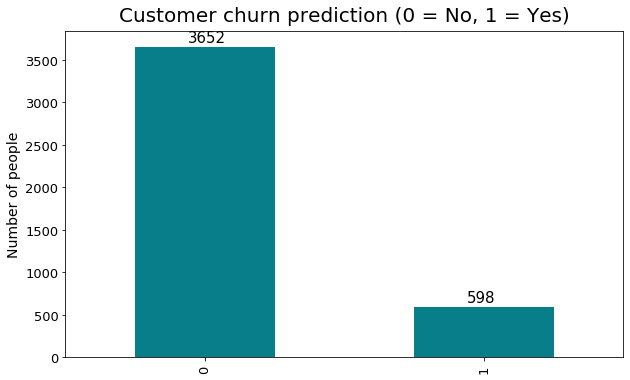

In [29]:
ax = scaled_df['churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Customer churn prediction (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of people', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

we can see that most of the target atrribute values are No. So the model might get biased. So we need to handle it using class imbalance techniques

### Class imbalance - Under sampling with TOMEK 

In [30]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks


ros = RandomOverSampler(random_state=42)

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
X, Y = ros.fit_resample(df.drop("churn",axis=1), df["churn"])

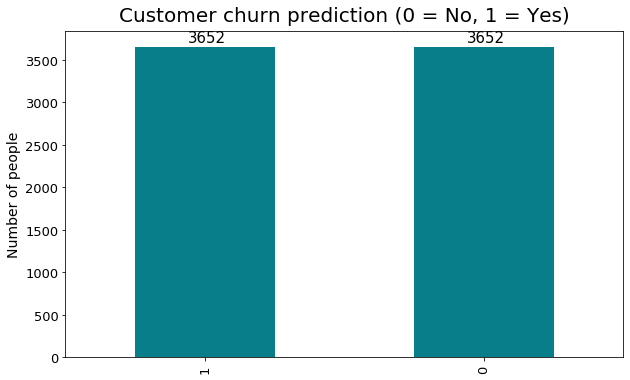

In [31]:
ax = Y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Customer churn prediction (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of people', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

## Feature selection

- Embedded feature selection

In [32]:
# Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [33]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [39]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

#### Now applying feature selction using embedded methods

In [42]:
model = RandomForestClassifier(n_estimators=1000)

model.fit(X,Y)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances*100})

final_df.set_index("Importances")

final_df


,Features,Importances
0,state,4.175896
1,account_length,3.037501
2,area_code,0.684155
3,international_plan,9.066047
4,voice_mail_plan,1.693234
5,number_vmail_messages,2.380801
6,total_day_minutes,13.284923
7,total_day_calls,2.843269
8,total_day_charge,12.515659
9,total_eve_minutes,5.301345


In [43]:
X= X[["state","international_plan","total_day_minutes","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","number_customer_service_calls"]]

## Splitting the dataset into test and train

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

## Applying models 

- Decision tree
- Naive bayes
- Logistic regression
- KNN
- SVM

### Decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dcls = DecisionTreeClassifier(max_depth= 3)

In [46]:
dcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
y_pred1 = dcls.predict(x_test)

In [48]:
y_pred1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [49]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred1)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred1))
print('Recall: %.3f' % recall_score(y_test, y_pred1))
print('F1 Score: %.3f' % f1_score(y_test, y_pred1))

[[1224  231]
 [ 309 1158]]
Precision: 0.834
Recall: 0.789
F1 Score: 0.811


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
accuracy_score(y_test,y_pred1)* 100

81.51950718685832

In [52]:
y_test.shape

(2922,)

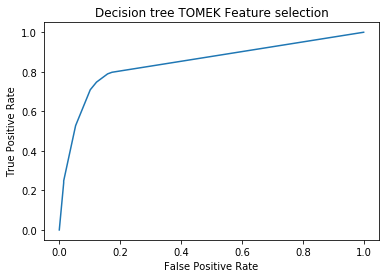

In [53]:
import sklearn.metrics as metrics
y_pred_proba1 = dcls.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Decision tree TOMEK Feature selection")
plt.show()

In [54]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(dcls,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.82272416 0.83025325 0.80766598 0.82546201 0.83013699]
Accuracy of model with cross validation score is :82.3248478711335


In [55]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(dcls,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.01101065, 0.01197433, 0.01000953, 0.00997663, 0.00997329]), 'score_time': array([0.00695324, 0.0079422 , 0.00598431, 0.00498724, 0.00594044]), 'test_precision': array([0.82937063, 0.84330484, 0.83185841, 0.84393064, 0.86186186]), 'test_recall': array([0.81232877, 0.8109589 , 0.77154583, 0.79890561, 0.78630137]), 'test_f1_score': array([0.82076125, 0.82681564, 0.80056778, 0.82080112, 0.82234957])}
Precision of model with precision score is :0.8420652754910263
Precision of model with recall score is :0.7960080954968799
Precision of model with f1 score is :0.8182590722569749


### Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [57]:
y_pred2  =  classifier.predict(x_test)

In [58]:
 y_pred2 

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred2)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred2))
print('Recall: %.3f' % recall_score(y_test, y_pred2))
print('F1 Score: %.3f' % f1_score(y_test, y_pred2))

[[1213  242]
 [ 306 1161]]
Precision: 0.828
Recall: 0.791
F1 Score: 0.809


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred2)
ac = accuracy_score(y_test,y_pred2)

In [61]:
print("Accuracy score: ",ac*100)

Accuracy score:  81.2457221081451


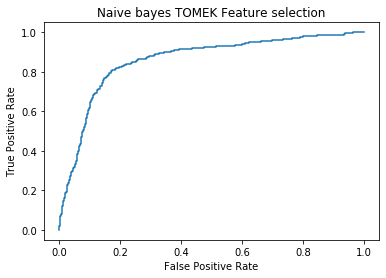

In [62]:
y_pred_proba2 = classifier.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)

#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Naive bayes TOMEK Feature selection")
plt.show()

In [63]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(classifier,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.80903491 0.81930185 0.7816564  0.81861739 0.81849315]
Accuracy of model with cross validation score is :80.94207382820923


In [64]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(classifier,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.00399208, 0.00398993, 0.00502682, 0.00399303, 0.00399232]), 'score_time': array([0.00498486, 0.00498462, 0.00598192, 0.00500464, 0.00498629]), 'test_precision': array([0.82446043, 0.84467456, 0.81595092, 0.83965015, 0.84857571]), 'test_recall': array([0.78493151, 0.78219178, 0.72777018, 0.7879617 , 0.77534247]), 'test_f1_score': array([0.80421053, 0.81223329, 0.76934201, 0.81298518, 0.8103078 ])}
Precision of model with precision score is :0.8346623532059232
Precision of model with recall score is :0.7716395255139329
Precision of model with f1 score is :0.8018157609495302


### Logistic Regression

In [65]:
### Applying the logistic regression:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred3 = lr.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [67]:
### checking the accuracy of the model:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [68]:
print("Accuracy score: ",accuracy_score(y_test,y_pred3)*100)

Accuracy score:  76.59137577002053


In [69]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred3)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred3))
print('Recall: %.3f' % recall_score(y_test, y_pred3))
print('F1 Score: %.3f' % f1_score(y_test, y_pred3))

[[1098  357]
 [ 327 1140]]
Precision: 0.762
Recall: 0.777
F1 Score: 0.769


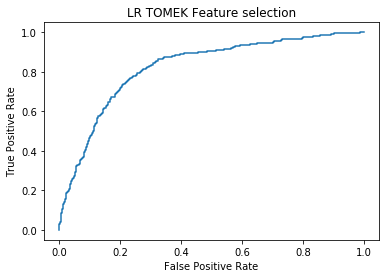

In [70]:
y_pred_proba3 = lr.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)

#create ROC curve
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("LR TOMEK Feature selection")
plt.show()

In [71]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.76591376 0.79397673 0.76454483 0.77412731 0.77054795]
Accuracy of model with cross validation score is :77.3822114708447


In [72]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(lr,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.01495934, 0.01196742, 0.01894951, 0.01396298, 0.01097083]), 'score_time': array([0.00498629, 0.00598383, 0.00598383, 0.0039885 , 0.00498629]), 'test_precision': array([0.75866667, 0.79586207, 0.7654321 , 0.77963738, 0.76298269]), 'test_recall': array([0.77945205, 0.79041096, 0.76333789, 0.76470588, 0.78493151]), 'test_f1_score': array([0.76891892, 0.79312715, 0.76438356, 0.77209945, 0.77380149])}
Precision of model with precision score is :0.7725161804216716
Precision of model with recall score is :0.7765676592395481
Precision of model with f1 score is :0.7744661122651344


### K Nearest Neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
y_pred4 = knn.predict(x_test)

In [75]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred4)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred4))
print('Recall: %.3f' % recall_score(y_test, y_pred4))
print('F1 Score: %.3f' % f1_score(y_test, y_pred4))

[[1240  215]
 [  35 1432]]
Precision: 0.869
Recall: 0.976
F1 Score: 0.920


In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred4)*100

91.44421629021218

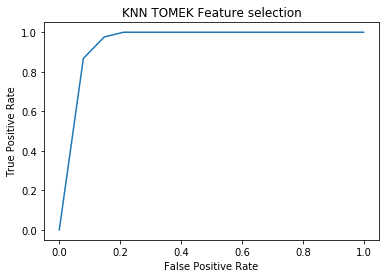

In [77]:
y_pred_proba4 = knn.predict_proba(x_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba4)

#create ROC curve
plt.plot(fpr4,tpr4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("KNN TOMEK Feature selection")
plt.show()

In [78]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(knn,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.92402464 0.92950034 0.93360712 0.93702943 0.9369863 ]
Accuracy of model with cross validation score is :93.22295669132608


In [79]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(knn,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.01296711, 0.01296115, 0.01201248, 0.01196718, 0.01301217]), 'score_time': array([0.04692054, 0.04384017, 0.04388118, 0.04483795, 0.04387951]), 'test_precision': array([0.8797546 , 0.88092345, 0.89039409, 0.89106487, 0.89875   ]), 'test_recall': array([0.98219178, 0.99315068, 0.98905609, 0.99589603, 0.98493151]), 'test_f1_score': array([0.92815534, 0.93367675, 0.93713545, 0.94056848, 0.93986928])}
Precision of model with precision score is :0.8881774024335533
Precision of model with recall score is :0.9890452185971554
Precision of model with f1 score is :0.9358810602786829


### Support Vector Machine

In [80]:
# support vector machine
from sklearn.svm import SVC 
svm=SVC() 
svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test) 

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred5)*100

87.47433264887063

In [82]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred5)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred5))
print('Recall: %.3f' % recall_score(y_test, y_pred5))
print('F1 Score: %.3f' % f1_score(y_test, y_pred5))

[[1291  164]
 [ 202 1265]]
Precision: 0.885
Recall: 0.862
F1 Score: 0.874


In [83]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(svm,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.87405886 0.88569473 0.86310746 0.88158795 0.88972603]
Accuracy of model with cross validation score is :87.883500698527


In [84]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(svm,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.87772059, 0.87968993, 0.87470222, 0.87366104, 0.89061713]), 'score_time': array([0.32506132, 0.33834887, 0.33610511, 0.33310819, 0.34208584]), 'test_precision': array([0.875     , 0.88827586, 0.87874465, 0.8896648 , 0.90469417]), 'test_recall': array([0.87260274, 0.88219178, 0.84268126, 0.87140903, 0.87123288]), 'test_f1_score': array([0.87379973, 0.88522337, 0.8603352 , 0.88044229, 0.88764829])}
Precision of model with precision score is :0.8872758969779178
Precision of model with recall score is :0.8680235369075952
Precision of model with f1 score is :0.877489774716436


## ADA Boost classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred6 = ada.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1455
           1       0.84      0.82      0.83      1467

    accuracy                           0.83      2922
   macro avg       0.83      0.83      0.83      2922
weighted avg       0.83      0.83      0.83      2922



In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred6)*100

83.23066392881589

In [88]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred6)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred6))
print('Recall: %.3f' % recall_score(y_test, y_pred6))
print('F1 Score: %.3f' % f1_score(y_test, y_pred6))

[[1224  231]
 [ 259 1208]]
Precision: 0.839
Recall: 0.823
F1 Score: 0.831


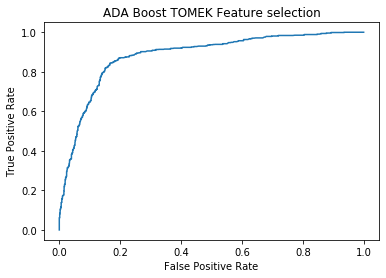

In [89]:
y_pred_proba5 = ada.predict_proba(x_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba5)

#create ROC curve
plt.plot(fpr5,tpr5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ADA Boost TOMEK Feature selection")
plt.show()

In [90]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(ada,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.8329911  0.84804928 0.82546201 0.83367556 0.84931507]
Accuracy of model with cross validation score is :83.7898605758863


In [91]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(ada,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.22439718, 0.22240663, 0.25831342, 0.22440076, 0.23133969]), 'score_time': array([0.0179522 , 0.01894951, 0.01798606, 0.01695681, 0.02094197]), 'test_precision': array([0.83196721, 0.8489011 , 0.84492754, 0.84366197, 0.85814607]), 'test_recall': array([0.83424658, 0.84657534, 0.79753762, 0.81942544, 0.8369863 ]), 'test_f1_score': array([0.83310534, 0.84773663, 0.82054891, 0.83136711, 0.84743412])}
Precision of model with precision score is :0.8455207774988907
Precision of model with recall score is :0.8269542566947136
Precision of model with f1 score is :0.8360384190691257


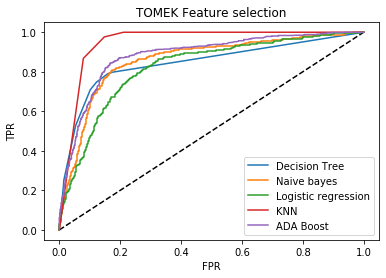

In [128]:
from sklearn.metrics import roc_curve

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Naive bayes")
plt.plot(fpr3, tpr3, label= "Logistic regression")
plt.plot(fpr4, tpr4, label= "KNN")
plt.plot(fpr5, tpr5, label= "ADA Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('TOMEK Feature selection')
plt.show()